In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 5.3 MB/s 
     |████████████████████████████████| 321 kB 38.4 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85441 sha256=ccd089fb0b90ea911b8d7b1f3decff28822716cf4eb07b9b41ad8f2cf7d8f865
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import string
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import contractions
from string import punctuation
from gensim.models import *

import tensorflow as tf
from tensorflow.keras.utils import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For reproducibility
np.random.seed(25)

In [ ]:
import nltk
posFilePath='/content/drive/MyDrive/Data/A3/rt-polarity.pos'
negFilePath='/content/drive/MyDrive/Data/A3/rt-polarity.neg'

with open(posFilePath, encoding="latin-1") as f:
    posData=f.readlines()
    
with open(negFilePath,encoding="latin-1") as f:
    negData=f.readlines()
posLabel = np.ones(len(posData))
negLabel = np.zeros(len(negData))

print(posLabel.shape , negLabel.shape)

(5331,) (5331,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
testSpltIndx=4500
testNeg=negData[testSpltIndx:]
testPos=posData[testSpltIndx:]
posTestLabel = posLabel[testSpltIndx:]
negTestLabel = negLabel[testSpltIndx:]

trainNeg=negData[:testSpltIndx]
trainPos=posData[:testSpltIndx]
posTrainLabel = posLabel[:testSpltIndx]
negTrainLabel = negLabel[:testSpltIndx]

print(posTestLabel.shape , posTrainLabel.shape )
print(testPos[0] , " ---------- " ,  trainPos[4499])

(831,) (4500,)
a good music documentary , probably one of the best since the last waltz . 
  ----------  without [de niro] , city by the sea would slip under the waves . he drags it back , single-handed . 



In [ ]:
train_texts =  trainPos + trainNeg
train_labels = posTrainLabel.tolist() + negTrainLabel.tolist()

test_texts = testPos + testNeg 
test_labels = posTestLabel.tolist() + negTestLabel.tolist()
print(len(train_texts), len(train_labels),len(test_texts), len(test_labels))

9000 9000 1662 1662


In [ ]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
# translator = str.maketrans('', '', string.punctuation)
def preprocess(texts):
  clean_texts = []
  for i in range(len(texts)):
    expanded_words = []
    words = texts[i].split(" ")
    for word in words:
      word = contractions.fix(word)
      word = word.translate(translator)
      tokens = word.split(" ")
      for token in tokens:
        if(len(token) > 1):
          expanded_words.append(token)      
    clean_texts.append(expanded_words)
  return clean_texts


In [ ]:
text = train_texts[:2]
return_text = preprocess(text)
print(train_texts[0],train_texts[1])
print(return_text[0])
print(return_text[1])

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 
 the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth . 

['the', 'rock', 'is', 'destined', 'to', 'be', 'the', '21st', 'century', 'new', 'conan', 'and', 'that', 'he', 'is', 'going', 'to', 'make', 'splash', 'even', 'greater', 'than', 'arnold', 'schwarzenegger', 'jean', 'claud', 'van', 'damme', 'or', 'steven', 'segal']
['the', 'gorgeously', 'elaborate', 'continuation', 'of', 'the', 'lord', 'of', 'the', 'rings', 'trilogy', 'is', 'so', 'huge', 'that', 'column', 'of', 'words', 'cannot', 'adequately', 'describe', 'co', 'writer', 'director', 'peter', 'jackson', 'expanded', 'vision', 'of', 'tolkien', 'middle', 'earth']


In [ ]:
X_train = preprocess(train_texts)
X_test = preprocess(test_texts)

In [ ]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train, train_labels)
X_test,y_test = shuffle(X_test, test_labels)

# X_train,y_train = shuffle(train_texts, train_labels)
# X_test,y_test = shuffle(test_texts, test_labels)
print(X_train[0])
print(y_train[0])


['an', 'incredibly', 'irritating', 'comedy', 'about', 'thoroughly', 'vacuous', 'people', 'manages', 'to', 'embody', 'the', 'worst', 'excesses', 'of', 'nouvelle', 'vague', 'without', 'any', 'of', 'its', 'sense', 'of', 'fun', 'or', 'energy']
0.0


In [ ]:

max_seq_length = max([len(item) for item in X_train])
average_seq_length = sum([len(s) for s in X_train]) / len(X_train)
print(max_seq_length , "-------" ,average_seq_length )

50 ------- 18.351444444444443


In [ ]:
max_len = 25

tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X_train)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_train = pad_sequences(sequence_train,padding='post', maxlen=max_len)
sequence_train = np.asarray(sequence_train)

sequence_test = tokenizer.texts_to_sequences(X_test)
sequence_test = pad_sequences(sequence_test,padding='post', maxlen=max_len)
sequence_test = np.asarray(sequence_test)

vocab_size = len(tokenizer.word_index) + 1
print("Train data shape : " , sequence_train.shape, "Test data shape : " , sequence_test.shape)
print(vocab_size)
# print(sequence_train[0])

Train data shape :  (9000, 25) Test data shape :  (1662, 25)
17046


In [ ]:
print(X_train[0])
sequence_train[0]

['an', 'incredibly', 'irritating', 'comedy', 'about', 'thoroughly', 'vacuous', 'people', 'manages', 'to', 'embody', 'the', 'worst', 'excesses', 'of', 'nouvelle', 'vague', 'without', 'any', 'of', 'its', 'sense', 'of', 'fun', 'or', 'energy']


array([1230, 1155,   55,   26,  612, 9032,  119,  270,    5, 9033,    1,
        348, 3345,    3, 6362, 2531,  127,   87,    3,   18,  144,    3,
        125,   37,  391], dtype=int32)

In [ ]:
def getModel(flag , embeddings):
  if(flag == 0):
    # define model
    model = Sequential()
    model.add(embeddings)
    model.add(LSTM(512, dropout=0.2, return_sequences=True))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
  elif(flag == 1):
    model = Sequential()
    model.add(embeddings)
    model.add(LSTM(512, dropout=0.2, return_sequences=True))
    model.add(LSTM(128, dropout=0.2, return_sequences=True))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
  elif(flag == 2):
    model = Sequential()
    model.add(embeddings)
    model.add(LSTM(1024, dropout=0.2, return_sequences=True))
    model.add(LSTM(256, dropout=0.2, return_sequences=True))
    model.add(LSTM(64, dropout=0.2, return_sequences=True))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [ ]:

# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
	return embedding

# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab , emd_size):
	# total vocabulary size plus 0 for unknown words
	vocab_size = len(vocab) + 1
	# define weight matrix dimensions with all 0
	weight_matrix = np.zeros((vocab_size, emd_size))
	# step vocab, store vectors using the Tokenizer's integer mapping
	for word, i in vocab.items():
		vector = embedding.get(word)
		if vector is not None:
			weight_matrix[i] = vector
	return weight_matrix

In [ ]:
# from gensim.models import KeyedVectors

# EMBEDDING_FILE = '/content/drive/MyDrive/Data/GoogleNews-vectors-negative300.bin'
# # !wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

# word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)


In [ ]:
x = word2vec.word_vec("test")
print(len(x)) 

In [ ]:
# vocab_size = len(tokenizer.word_index) + 1
# embedding_matrix_w2v = np.random.random((vocab_size, 300))
# pas = 0
# count = 0 
# for word,i in tokenizer.word_index.items():
#     # if(pas < 10):
#     #   print(word)
#     try:
#         embedding_matrix_w2v[i] = word2vec.wv[word]
#         # print(word , i )
#     except:
#         pas+=1
# print('not in vocabulary', pas)

# np.save("/content/drive/MyDrive/Data/A3/embedding_matrix_w2v", embedding_matrix_w2v)

# # create the embedding layer
# w2v_embeddings = Embedding(vocab_size, 300, weights=[embedding_matrix_w2v], input_length=max_len, trainable=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


not in vocabulary 1884


In [ ]:
embedding_matrix_w2v = np.load("/content/drive/MyDrive/Data/A3/embedding_matrix_w2v.npy")
w2v_embeddings = Embedding(vocab_size, 300, weights=[embedding_matrix_w2v], input_length=max_len, trainable=False)


In [ ]:

# define model
w2v = Sequential()
w2v.add(w2v_embeddings)
# w2v.add(LSTM(1024, dropout=0.2, return_sequences=True))
# w2v.add(LSTM(256, dropout=0.2, return_sequences=True))
# w2v.add(LSTM(64, dropout=0.2, return_sequences=True))
w2v.add(Bidirectional(LSTM(512, dropout=0.2, return_sequences=True)))
w2v.add(Bidirectional(LSTM(128, dropout=0.2, return_sequences=True)))
w2v.add(Bidirectional(LSTM(32, dropout=0.2)))
w2v.add(Dense(1, activation='sigmoid'))
print(w2v.summary())
# compile network
w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
# fit network
history = w2v.fit(sequence_train, np.asarray(y_train),
                          shuffle = True,
                    batch_size=256,
                    epochs=20,
                    callbacks=[callback],
                    validation_split=0.2)

# evaluate
loss, acc = w2v.evaluate(sequence_test,np.asarray(y_test), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 25, 300)           5113800   
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 25, 1024)          3330048   
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 25, 256)           1180672   
_________________________________________________________________
bidirectional_28 (Bidirectio (None, 64)                73984     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 9,698,569
Trainable params: 4,584,769
Non-trainable params: 5,113,800
_________________________________________________________________
None
Epoch 1/20
29/29 [==============================] - 19s 255ms/step - loss: 0.6961 - accuracy: 0.5

0
1
2


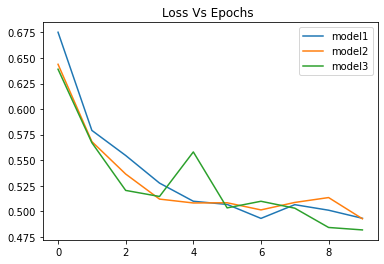

In [ ]:
plt.title('Loss Vs Epochs ' )
for i in range(3):
  print(i)
  w2v = getModel(i ,w2v_embeddings )
  history = w2v.fit(sequence_train, np.asarray(y_train),
                          shuffle = True,
                    batch_size=256,
                    epochs=10,
                    verbose= 0,
                    validation_split=0.2)

  plt.plot(history.history['val_loss'],label="model"+str(i+1))
  plt.legend()

In [ ]:
# fasttext_embeddings = load_embedding('/content/drive/MyDrive/Data/cc.en.300.vec/cc.en.300.vec')
# # get vectors in the right order
# embedding_matrix_ft = get_weight_matrix(fasttext_embeddings, tokenizer.word_index, 300)
# # create the embedding layer
# ft_embeddings = Embedding(vocab_size, 300, weights=[embedding_matrix_ft], input_length=max_len, trainable=False)
# np.save("/content/drive/MyDrive/Data/A3/embedding_matrix_ft", embedding_matrix_ft)


In [ ]:
embedding_matrix_ft = np.load("/content/drive/MyDrive/Data/A3/embedding_matrix_ft.npy")
ft_embeddings = Embedding(vocab_size, 300, weights=[embedding_matrix_ft], input_length=max_len, trainable=False)

In [ ]:

# define model
ft = Sequential()
ft.add(ft_embeddings)
# ft.add(LSTM(1024, dropout=0.2, return_sequences=True))
# ft.add(LSTM(256, dropout=0.2, return_sequences=True))
# ft.add(LSTM(64, dropout=0.2, return_sequences=True))
ft.add(Bidirectional(LSTM(512, dropout=0.2, return_sequences=True)))
ft.add(Bidirectional(LSTM(128, dropout=0.2, return_sequences=True)))
ft.add(Bidirectional(LSTM(32, dropout=0.2)))
ft.add(Dense(1, activation='sigmoid'))
print(ft.summary())
# compile network
ft.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
# fit network
history = ft.fit(sequence_train, np.asarray(y_train),
                          shuffle = True,
                    batch_size=256,
                    epochs=20,
                    callbacks = [callback],
                    validation_split=0.2)

# evaluate
loss, acc = ft.evaluate(sequence_test,np.asarray(y_test), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 25, 300)           5113800   
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 25, 1024)          3330048   
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 25, 256)           1180672   
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 64)                73984     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 9,698,569
Trainable params: 4,584,769
Non-trainable params: 5,113,800
_________________________________________________________________
None
Epoch 1/20
29/29 [==============================] - 18s 253ms/step - loss: 0.6438 - accuracy: 0.6

0
1
2


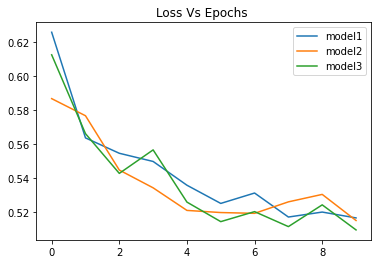

In [ ]:
plt.title('Loss Vs Epochs ' )
for i in range(3):
  print(i)
  ft = getModel(i ,ft_embeddings )
  history = ft.fit(sequence_train, np.asarray(y_train),
                          shuffle = True,
                    batch_size=256,
                    epochs=10,
                    verbose= 0,
                    validation_split=0.2)

  plt.plot(history.history['val_loss'],label="model"+str(i+1))
  plt.legend()

In [ ]:
# # load embedding from file
# glove_embedding = load_embedding('/content/drive/MyDrive/Data/glove.6B.300d.txt')
# # get vectors in the right order
# embedding_matrix_glove = get_weight_matrix(glove_embedding, tokenizer.word_index ,300)
# # create the embedding layer
# glove_embeddings = Embedding(vocab_size, 100, weights=[embedding_matrix_glove], input_length=max_len, trainable=False)
# np.save("/content/drive/MyDrive/Data/A3/embedding_matrix_glove", embedding_matrix_glove)

In [ ]:
embedding_matrix_glove = np.load("/content/drive/MyDrive/Data/A3/embedding_matrix_glove.npy")
glove_embeddings = Embedding(vocab_size, 300, weights=[embedding_matrix_glove], input_length=max_len, trainable=False)

In [ ]:
# define model
glove = Sequential()
glove.add(glove_embeddings)
# glove.add(LSTM(1024, dropout=0.2, return_sequences=True))
# glove.add(LSTM(256, dropout=0.2, return_sequences=True))
# glove.add(LSTM(64, dropout=0.2))
glove.add(Bidirectional(LSTM(512, dropout=0.2, return_sequences=True)))
glove.add(Bidirectional(LSTM(128, dropout=0.2, return_sequences=True)))
glove.add(Bidirectional(LSTM(32, dropout=0.2)))
glove.add(Dense(1, activation='sigmoid'))
print(glove.summary())
# compile network
glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
# fit network
history = glove.fit(sequence_train, np.asarray(y_train),
                          shuffle = True,
                    batch_size=256,
                    epochs=20,
                    callbacks = [callback],
                    validation_split=0.2)# evaluate
loss, acc = glove.evaluate(sequence_test,np.asarray(y_test), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 25, 300)           5113800   
_________________________________________________________________
bidirectional_35 (Bidirectio (None, 25, 1024)          3330048   
_________________________________________________________________
bidirectional_36 (Bidirectio (None, 25, 256)           1180672   
_________________________________________________________________
bidirectional_37 (Bidirectio (None, 64)                73984     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 9,698,569
Trainable params: 4,584,769
Non-trainable params: 5,113,800
_________________________________________________________________
None
Epoch 1/20
29/29 [==============================] - 19s 252ms/step - loss: 0.6229 - accuracy: 0.6

0
1
2


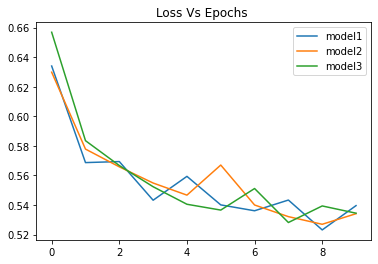

In [ ]:
plt.title('Loss Vs Epochs ' )
for i in range(3):
  print(i)
  ft = getModel(i ,glove_embeddings )
  history = ft.fit(sequence_train, np.asarray(y_train),
                          shuffle = True,
                    batch_size=256,
                    epochs=10,
                    verbose= 0,
                    validation_split=0.2)

  plt.plot(history.history['val_loss'],label="model"+str(i+1))
  plt.legend()

In [ ]:


def DME( emb_matrices , maxlen):
    
    output = []
    s = []
    
    #input to the model 
    inp = Input(shape=(maxlen, ))

    #get embeddings 
    e1 = Embedding(vocab_size, 300, weights=[emb_matrices[0]], input_length=max_len, trainable=False)
    e2 = Embedding(vocab_size, 300, weights=[emb_matrices[1]], input_length=max_len, trainable=False)
    e3 = Embedding(vocab_size, 300, weights=[emb_matrices[2]], input_length=max_len, trainable=False)

    # projection of embeddings on  (d*d' : 300*100) matrix 
    p1 = LSTM(100, return_sequences=True)(e1(inp))
    p2 = LSTM(100, return_sequences=True)(e2(inp))
    p3 = LSTM(100, return_sequences=True)(e3(inp))

    # lstm_layer = LSTM(100, return_sequences=True)
    # p1 = lstm_layer(e1(inp))
    # p2 = lstm_layer(e2(inp))
    # p3 = lstm_layer(e3(inp))

    # a vector (d'*1 : 100*1)
    dense_layer = Dense(1, activation='sigmoid')
    
    s1 = dense_layer(p1)
    s2 = dense_layer(p2)
    s3 = dense_layer(p3)

    p1 = Reshape((-1,100,1))(p1)
    p2 = Reshape((-1,100,1))(p2)
    p3 = Reshape((-1,100,1))(p3)
 
    output.append(p1)
    output.append(p2)
    output.append(p3)
    
    # projected matrix (N*d' : 2*100)
    p =  Concatenate(axis=-1)(output) #projected matrix

    s1 = Reshape((-1,1,1))(s1)
    s2 = Reshape((-1,1,1))(s2)
    s3 = Reshape((-1,1,1))(s3)

    s.append(s1)
    s.append(s2)
    s.append(s3)
    
    # vector(N*1:2*1)
    s =  Concatenate(axis=-1)(s)
    
    # (s^T*p) = dme 
    f = multiply([p, s])
    out = Lambda(lambda t: K.sum(t, axis=-1))(f)

    return Model(inp, out)


In [ ]:
print(embedding_matrix_w2v.shape , embedding_matrix_ft.shape)

(17046, 300) (17046, 300)


In [ ]:
dme = DME([embedding_matrix_w2v, embedding_matrix_ft , embedding_matrix_glove] , max_len)
x = Bidirectional(LSTM(512, dropout=0.2, return_sequences=True))(dme.output)
x = Bidirectional(LSTM(128, dropout=0.2, return_sequences=True))(x)
x = Bidirectional(LSTM(32, dropout=0.2))(x)
out = Dense(1, activation='sigmoid')(x)

dme_model = Model(dme.input, out)
dme_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

dme_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 25, 300)      5113800     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 25, 300)      5113800     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 25, 300)      5113800     input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:

Wsave = dme_model.get_weights()

def dme_modelFit(x_train , y_train):
  
  num_epochs = 10
  batch_sizes = [4 , 8 , 16 , 32, 64 , 100 , 128 , 256]
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min' ,patience=5)
  if(1):
    plt.title('Loss Vs Epochs ' )
    for batch_size in batch_sizes:
      dme_model.set_weights(Wsave)
 
      history = dme_model.fit(x_train , y_train,
                          shuffle = True,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    callbacks=[callback],
                    validation_split=0.2)
      
      plt.plot(history.history['val_loss'],label="bs"+str(batch_size))
      plt.legend()
      # plt.show() 

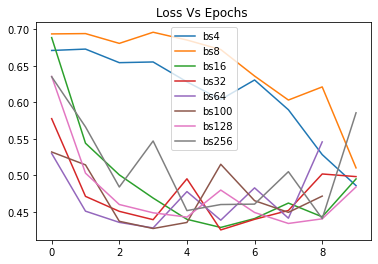

In [ ]:
dme_modelFit(sequence_train, np.asarray(y_train))

In [ ]:
def dme_modelFit2(x_train , y_train):
  
  num_epochs = 20
  batch_sizes = [4 , 8 , 16]
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min' ,patience=5)
  if(1):
    plt.title('Loss Vs Epochs ' )
    for batch_size in batch_sizes:
      dme_model.set_weights(Wsave)
      history = dme_model.fit(x_train , y_train,
                          shuffle = True,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    callbacks=[callback],
                    validation_split=0.2)
      
      plt.plot(history.history['val_loss'],label="bs"+str(batch_size))
      plt.legend()
      # plt.show() 

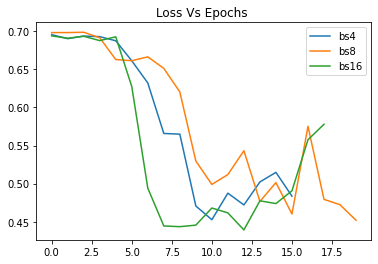

In [ ]:
dme_modelFit2(sequence_train, np.asarray(y_train))

In [ ]:
dme_model.fit(sequence_train, np.asarray(y_train), batch_size=256, epochs=10, verbose=2, validation_split=0.2)
dme_model.evaluate(sequence_test,np.asarray(y_test), verbose=0)

[0.5100926160812378, 0.7701564431190491]

In [ ]:
# def Concat_Emb(list_emb, maxlen):
    
#     inputs = []
#     output = []
#     for embedding in list_emb:
        
#         inp = Input(shape=(maxlen,))
#         emb = Embedding(vocab_size, 300, weights=[embedding], trainable=False)(inp)
#         emb = Reshape((-1,300,1))(emb)
#         inputs.append(inp)
#         output.append(emb)
        
#     concat = Concatenate(axis=-1)(output)
    
#     return Model(inputs, concat)


# def DME(maxlen):

#     inp = Input(shape=(maxlen, 300, 2))
#     x = Reshape((maxlen, 300*2))(inp)
#     x = LSTM(2, return_sequences=True)(x)
#     x = Activation('sigmoid')(x)
#     x = Reshape((maxlen, 1, 2))(x)
#     x = multiply([inp, x])
#     out = Lambda(lambda t: K.sum(t, axis=-1))(x)
    
#     return Model(inp, out)

def DME( emb_matrices , maxlen):
    
    output = []
    s = []
    
    #input to the model 
    inp = Input(shape=(maxlen, ))

    #get embeddings 
    e1 = Embedding(vocab_size, 300, weights=[emb_matrices[0]], input_length=max_len, trainable=False)
    e2 = Embedding(vocab_size, 300, weights=[emb_matrices[1]], input_length=max_len, trainable=False)

    # projection of embeddings on  (d*d' : 300*100) matrix 
    p1 = LSTM(100, return_sequences=True)(e1(inp))
    p2 = LSTM(100, return_sequences=True)(e2(inp))

    # lstm_layer = LSTM(100, return_sequences=True)
    # p1 = lstm_layer(e1(inp))
    # p2 = lstm_layer(e2(inp))

    # a vector (d'*1 : 100*1)
    dense_layer = Dense(1, activation='sigmoid')
    
    s1 = dense_layer(p1)
    s2 = dense_layer(p2)

    p1 = Reshape((-1,100,1))(p1)
    p2 = Reshape((-1,100,1))(p2)
 
    output.append(p1)
    output.append(p2)
    
    # projected matrix (N*d' : 2*100)
    p =  Concatenate(axis=-1)(output) #projected matrix

    s1 = Reshape((-1,1,1))(s1)
    s2 = Reshape((-1,1,1))(s2)

    s.append(s1)
    s.append(s2)
    
    # vector(N*1:2*1)
    s =  Concatenate(axis=-1)(s)
    
    # (s^T*p) = dme 
    f = multiply([p, s])
    out = Lambda(lambda t: K.sum(t, axis=-1))(f)

    return Model(inp, out)

In [ ]:
dme = DME([embedding_matrix_w2v, embedding_matrix_ft] , max_len)
x = Bidirectional(LSTM(128, dropout=0.2, return_sequences=True))(dme.output)
# concat_inp = Concat_Emb([embedding_matrix_w2v, embedding_matrix_ft], maxlen=max_len)
# dme = DME(max_len)
# x = dme(concat_inp.output)
# x = Bidirectional(LSTM(1024, dropout=0.2, return_sequences=True))(x)
# x = Bidirectional(LSTM(128, dropout=0.2, return_sequences=True))(x)
x = Bidirectional(LSTM(32, dropout=0.2))(x)
out = Dense(1, activation='sigmoid')(x)

# dme_model = Model(concat_inp.input, out)
dme_model = Model(dme.input, out)
dme_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

dme_model.summary()

Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, 25, 300)      5113800     input_22[0][0]                   
__________________________________________________________________________________________________
embedding_26 (Embedding)        (None, 25, 300)      5113800     input_22[0][0]                   
__________________________________________________________________________________________________
lstm_42 (LSTM)                  (None, 25, 100)      160400      embedding_25[0][0]               
___________________________________________________________________________________________

In [ ]:
dme_model.fit(sequence_train, np.asarray(y_train), batch_size=256, epochs=5, verbose=2, validation_split=0.2)

Epoch 1/5
29/29 - 16s - loss: 0.6401 - accuracy: 0.6204 - val_loss: 0.5220 - val_accuracy: 0.7389
Epoch 2/5
29/29 - 2s - loss: 0.5373 - accuracy: 0.7347 - val_loss: 0.4826 - val_accuracy: 0.7872
Epoch 3/5
29/29 - 2s - loss: 0.4960 - accuracy: 0.7603 - val_loss: 0.4664 - val_accuracy: 0.7728
Epoch 4/5
29/29 - 2s - loss: 0.4749 - accuracy: 0.7679 - val_loss: 0.4430 - val_accuracy: 0.7833
Epoch 5/5
29/29 - 2s - loss: 0.4435 - accuracy: 0.7925 - val_loss: 0.4331 - val_accuracy: 0.7900


In [ ]:
# dme_model.evaluate([sequence_test]*2,np.asarray(y_test), verbose=0)
dme_model.evaluate(sequence_test,np.asarray(y_test), verbose=0)

[0.48011913895606995, 0.756317675113678]